In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
spam_df = pd.read_csv('/content/drive/MyDrive/Gen AI Udemy/NLP Prerequisite/spam.csv', encoding = 'latin-1')

In [80]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [81]:
spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [82]:
spam_df.columns = ['label', 'message']

In [83]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [84]:
spam_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [85]:
spam_df['message'].value_counts().max(), spam_df['message'].value_counts().min()

(30, 1)

In [86]:
def length_of_message(message):
  return len(message)

spam_df['length'] = spam_df['message'].apply(length_of_message)

### Checking out the class distributions

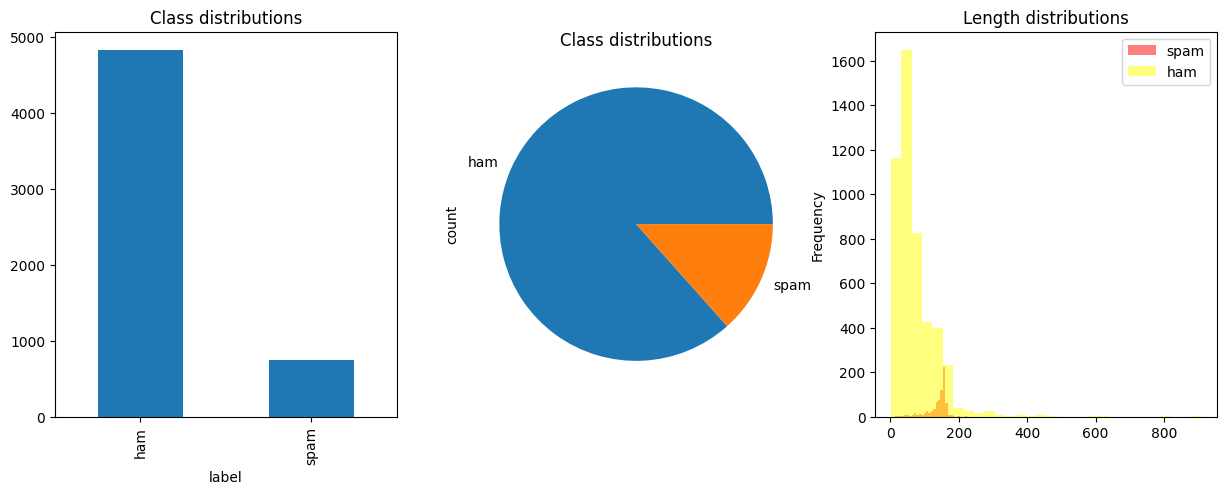

<Figure size 640x480 with 0 Axes>

In [87]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
spam_df['label'].value_counts().plot(kind = 'bar');
plt.title("Class distributions");

plt.subplot(1,3,2)
spam_df['label'].value_counts().plot(kind = 'pie');
plt.title("Class distributions");

plt.subplot(1,3,3)
spam_df[spam_df.label == 'spam'].length.plot(kind = 'hist',bins=30, alpha = 0.5,label = 'spam',color = "red");
spam_df[spam_df.label == 'ham'].length.plot(kind = 'hist',bins = 30, alpha = 0.5,label = 'ham',color = 'yellow');
plt.legend()
plt.title("Length distributions");
plt.show();
plt.tight_layout();

### Peforming Text pre processing

In [88]:
stop_words = set(stopwords.words('english'))

In [89]:
lematizer = WordNetLemmatizer()

In [90]:
nltk.download('punkt')
nltk.download('wordnet')
import re
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
for i in range(len(spam_df)):
  review = re.sub('[^a-zA-Z]',' ',spam_df['message'][i])
  review = review.lower()
  review = review.split()
  review = [lematizer.lemmatize(word) for word in review if word not in stop_words]
  review = ' '.join(review)
  spam_df['message'][i] = review

Streaming output truncated to the last 5000 lines.
<ipython-input-91-139082f6bef5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['message'][i] = review
<ipython-input-91-139082f6bef5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['message'][i] = review
<ipython-input-91-139082f6bef5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['message'][i] = review
<ipython-input-91-139082f6bef5>:7: SettingWithCopyWa

In [92]:
spam_df.head()

,label,message,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah think go usf life around though,61


In [93]:
spam_df['length'] = spam_df['message'].apply(length_of_message)

In [94]:
spam_df.head()

,label,message,length
0,ham,go jurong point crazy available bugis n great ...,82
1,ham,ok lar joking wif u oni,23
2,spam,free entry wkly comp win fa cup final tkts st ...,101
3,ham,u dun say early hor u c already say,35
4,ham,nah think go usf life around though,35


In [95]:
spam_df['tokens'] = spam_df['message'].apply(word_tokenize)

In [96]:
word2vec = Word2Vec(sentences = spam_df['tokens'], window = 5, min_count = 1, workers = 4)
word2vec.save('word2vec_spam_model')

In [97]:
spam_df.head()

,label,message,length,tokens
0,ham,go jurong point crazy available bugis n great ...,82,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,23,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry wkly comp win fa cup final tkts st ...,101,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say early hor u c already say,35,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah think go usf life around though,35,"[nah, think, go, usf, life, around, though]"


In [98]:
def embeddings(tokens, model):
  word_vectors = [model.wv[word] for word in tokens if word in model.wv]
  if len(word_vectors)>0:
    return np.mean(word_vectors, axis = 0)
  else:
    return np.zeros(model.vector_size)

In [99]:
spam_df['embeddings'] = spam_df['tokens'].apply(lambda tokens: embeddings(tokens, word2vec))

In [100]:
spam_df.head()

,label,message,length,tokens,embeddings
0,ham,go jurong point crazy available bugis n great ...,82,"[go, jurong, point, crazy, available, bugis, n...","[-0.09511079, 0.27126798, 0.021937627, -0.0591..."
1,ham,ok lar joking wif u oni,23,"[ok, lar, joking, wif, u, oni]","[-0.09267088, 0.26485085, 0.025451379, -0.0518..."
2,spam,free entry wkly comp win fa cup final tkts st ...,101,"[free, entry, wkly, comp, win, fa, cup, final,...","[-0.0911114, 0.2518581, 0.023185514, -0.056631..."
3,ham,u dun say early hor u c already say,35,"[u, dun, say, early, hor, u, c, already, say]","[-0.15828101, 0.44124493, 0.039404027, -0.0932..."
4,ham,nah think go usf life around though,35,"[nah, think, go, usf, life, around, though]","[-0.11246502, 0.31257817, 0.024520343, -0.0656..."


Converting the labels into numerical values

In [101]:
y = spam_df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [102]:
X = np.array(spam_df['embeddings'].tolist())

In [103]:
y[:5]

,label
0,0
1,0
2,1
3,0
4,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [105]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.28%


In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.41%


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       965
           1       0.96      0.77      0.85       150

    accuracy                           0.96      1115
   macro avg       0.96      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115



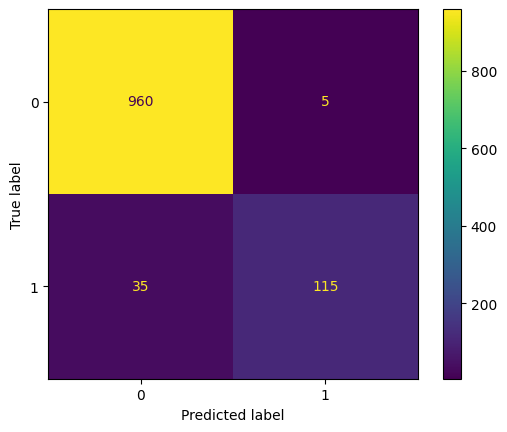

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)